In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading covid data
covid19 = pd.read_csv('../data/raw/covid_19_data.csv')

In [4]:
task2 = pd.read_csv('../data/raw/mitigation.csv')

In [5]:
task2.head(2)

,ID,Applies To,Country,Date Start,Date end intended,Description of measure implemented,Exceptions,Implementing City,Implementing State/Province,Keywords,Quantity,Source,Target city,Target country,Target region,Target state
0,163,NaN,Austria,"Mar 16, 2020",NaN,On 10 March 2020 government announced that all...,NaN,NaN,NaN,university closure,NaN,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN,NaN,NaN
1,132,NaN,Germany,"Feb 01, 2020",NaN,"102 German citizens and 26 relatives, all of w...",NaN,NaN,NaN,international traveller quarantine - risk coun...,0.0001,https://www.tagesschau.de/inland/coronavirus-g...,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_colwidth', 150)

In [7]:
policy = task2[['Country','Date Start','Description of measure implemented']]\
.sort_values('Date Start',ascending=True)

In [8]:
policy.head(3)

,Country,Date Start,Description of measure implemented
1458,South Korea,"Apr 01, 2020",All arrival passengers from the world (including travel and short term travellers)- must be in 14 days quarantine either in self-isolation (if you...
1695,US:Louisiana,"Apr 02, 2020",text alert system announced
1690,US: Rhode Island,"Apr 03, 2020","State beaches and parks closed as of this date, Governor Raimondo cites a lack of social distancing as the reason for the decision"


In [9]:
covid19 = covid19.groupby(['Country/Region', 'ObservationDate'])[['Confirmed', 'Deaths', 'Recovered']].agg('sum')
covid19['CurrentConfirmed'] = covid19['Confirmed'] - covid19['Recovered'] - covid19['Deaths']
covid19.head()

Confirmed  Deaths  Recovered  \
Country/Region  ObservationDate                                 
 Azerbaijan     02/28/2020             1.0     0.0        0.0   
('St. Martin',) 03/10/2020             2.0     0.0        0.0   
Afghanistan     02/24/2020             1.0     0.0        0.0   
                02/25/2020             1.0     0.0        0.0   
                02/26/2020             1.0     0.0        0.0   

                                 CurrentConfirmed  
Country/Region  ObservationDate                    
 Azerbaijan     02/28/2020                    1.0  
('St. Martin',) 03/10/2020                    2.0  
Afghanistan     02/24/2020                    1.0  
                02/25/2020                    1.0  
                02/26/2020                    1.0

In [10]:
def growth_rate(data=None):
    x = []
    x.append(0)
    for i in range(data.shape[0]-1):
        a = data.iloc[i+1]-data.iloc[i]
        if data.iloc[i] == 0:
            v = 0.0
        else:
            v = a/data.iloc[i]
        #v=v*100
        x.append(v)
        
    return np.array(x)

In [11]:
def compute_growth_rate(data=None):
    """
        :params data
        
    """
    for c in ['Confirmed', 'Recovered', 'Deaths','CurrentConfirmed']:
        r = 'growth_rate_{}'.format(c)
        data.loc[:,r] = growth_rate(data.loc[:,c])
        
    return data.copy()

In [12]:
policy.Country.unique()


array(['South Korea', 'US:Louisiana', 'US: Rhode Island', 'US:Hawaii',
       'Taiwan', 'US: Massachussets', 'China', 'Macau', 'Hong Kong',
       'Belgium', 'Japan', 'Trinidad and Tobago', 'Singapore', 'Nepal',
       'Vietnam', 'Australia', 'Germany', 'North Korea', 'New Zealand',
       'US:California', 'Brazil', 'United States', 'Czechia', 'Russia',
       'Qatar', 'Georgia', 'US:Alabama', 'Colombia', 'US: Wisconsin',
       'Italy', 'US: Connecticut', 'France', 'Spain', 'Egypt', 'Israel',
       'Poland', 'Romania', 'Iraq', 'Iran', 'Cyprus', 'Afghanistan',
       'Denmark', 'Albania', 'Croatia', 'Austria', 'Switzerland',
       'Macedonia', 'Greece', 'United Kingdom', 'Norway', 'San Marino',
       'Estonia', 'Netherlands', 'Belarus', 'Lithuania', 'Iceland',
       'Azerbaijan', 'India', 'Monaco', 'US:Washington', 'Ireland',
       'European Union', 'Thailand', 'US:Maryland', 'US: Illinois',
       'Uganda', 'Hungary', 'Finland', 'Sweden', 'US: Florida',
       'US:New York', 'Por

In [13]:
covid19.head(3)

,,Confirmed,Deaths,Recovered,CurrentConfirmed
Country/Region,ObservationDate,,,,
Azerbaijan,02/28/2020,1.0,0.0,0.0,1.0
"('St. Martin',)",03/10/2020,2.0,0.0,0.0,2.0
Afghanistan,02/24/2020,1.0,0.0,0.0,1.0


In [14]:
country = covid19.reset_index()
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 6 columns):
Country/Region      36931 non-null object
ObservationDate     36931 non-null object
Confirmed           36931 non-null float64
Deaths              36931 non-null float64
Recovered           36931 non-null float64
CurrentConfirmed    36931 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.7+ MB


In [15]:
country.loc[:, 'ObservationDate'] = pd.to_datetime(country.loc[:, 'ObservationDate'])
country.loc[:, 'Confirmed'] = pd.to_numeric(country.loc[:, 'Confirmed'], errors='coerce')
country.loc[:,'Recovered'] = pd.to_numeric(country.loc[:,'Recovered'], errors='coerce')
country.loc[:,'Deaths'] = pd.to_numeric(country.loc[:,'Deaths'], errors='coerce')
policy.loc[:, 'Date Start'] = pd.to_datetime(policy.loc[:, 'Date Start'])

In [16]:
country['Country/Region'].unique()

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'F

# China Containment and mitigation measures

In [17]:
#looking at China first as it was point zero of the virus
china = policy[policy.Country == 'China'].sort_values(by=['Date Start'])
mainland_china = country[country['Country/Region'] == 'Mainland China']

In [18]:
# to see date that policy has started at China
china['Date Start'].unique()

array(['2019-12-18T00:00:00.000000000', '2019-12-25T00:00:00.000000000',
       '2019-12-30T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-02-02T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000', '2020-02-04T00:00:00.000000000',
       '2020-02-05T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
       '2020-02-07T00:00:00.000000000', '2020-02-08T00:00:00.000000000',
       '2020-02-09T00:00:00.000000000', '2020-02-10T00:00:00.000000000',
       '2020-02-11T00:00:00.000000000', '2020-02-12T00:00:00.000000000',
       '2020-02-13T00:00:00.000000000', '2020-02-14T00:00:00.000000000',
       '2020-02-15T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-02-18

## Before

In [19]:
china[china['Date Start'] < '2020-02-22'].style.set_properties(**{'background-color': 'white',
                            'color': 'black',
                            'border-color': 'green'})


,Country,Date Start,Description of measure implemented
150,China,2019-12-18 00:00:00,Seven cases of COVID-19 documented in Wuhan
151,China,2019-12-25 00:00:00,Medical staff in two Wuhan hospitals were suspected of contracting the virus; first reports of isolation being used
152,China,2019-12-30 00:00:00,Wuhan CDC confirmed 27 cases of viral pneumonia of unknown cause; all hospitals required to report all cases of unkown origin and related to Huanan Seafood Market and give patients proper treatment;
153,China,2020-01-01 00:00:00,Huanan Seafood Market closed by Jianghan District's Health Agency and Administration for Market Regulation for 'environment improvement'; workers in hazmat suits inspected market and collected samples
157,China,2020-01-03 00:00:00,"Research on virus commenced; 44 cases reported, 120 close contacts started being monitored"
166,China,2020-01-08 00:00:00,Scientists announce new coronavirus
205,China,2020-01-10 00:00:00,First two patients outside Wuhan admitted to hospital in Shenzhen
206,China,2020-01-12 00:00:00,"700 close contacts of initial 41 infections closely monitored with no new infections; WHO published initial guidance on travel, lab testing and medical investigation"
154,China,2020-01-15 00:00:00,"Wuhan Municipal Health Commission stated on it's website that there was no clear indication of human to human transmission but did not rule out the possibility, although maintained that the risk of human to human transmission was low; total case number 41"
156,China,2020-01-20 00:00:00,Case numbers rose to 136; Beijing and Shenzhen reported first cases


In [20]:
gr_china = compute_growth_rate(mainland_china)

In [21]:
cols = list(set(gr_china.columns) - set(['Confirmed', 'Deaths', 'Recovered','Country/Region','CurrentConfirmed',
                                        'growth_rate_CurrentConfirmed']))
icols = ['ObservationDate', 'Confirmed', 'Recovered', 'Deaths']

## After

In [22]:
china[china['Date Start'] >= '2020-02-22'].style.set_properties(**{'background-color': 'white',
                            'color': 'black',
                            'border-color':'white'})


,Country,Date Start,Description of measure implemented
258,China,2020-02-22 00:00:00,Wuhan requires a 14-day quarantine for patients discharged from COVID-19.
1189,China,2020-02-24 00:00:00,This estimate is an approximation and is mentioned in page 9 of the report. No exact date for the testing period is provided.
259,China,2020-02-25 00:00:00,"In response the epidemic situation in South Korea and an apparent significant surge of demand for flight tickets from South Korea to Shandong cities, Qingdao will now quarantine all persons entering with a travel history of areas with the epidemic,[692] Weihai will now quarantine all persons entering from Japan and South Korea for 14 days,[693] Shenyang will now test the temperature of all passengers entering from the city,[694] and Dalian will now include all foreigners into its epidemic control mechanism."
263,China,2020-02-25 00:00:00,Beijing required foreign travellers arriving from areas affected by COVID-19 to be quarantined for 14 days.
261,China,2020-02-25 00:00:00,Guangzhou will now test all inpatients for SARS-CoV-19.
264,China,2020-02-26 00:00:00,"Yantai, Shandong will now test all persons entering China from the city for SARS-CoV-2 for free."


## Growth Rate

Text(0, 0.5, 'growth rate')

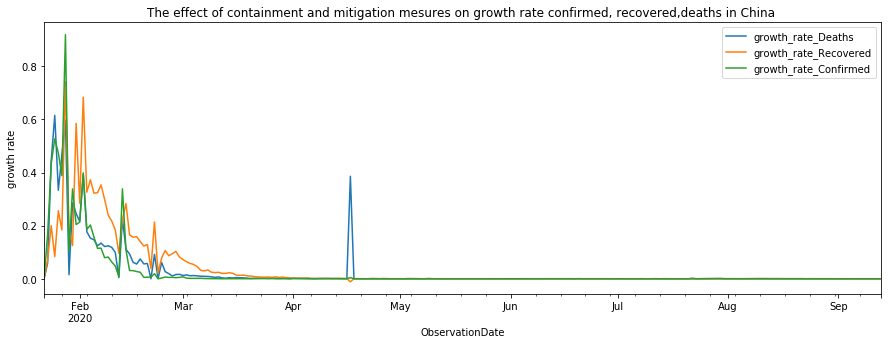

In [23]:
mainland_china[cols].plot(x='ObservationDate', figsize=(15,5))
plt.title('The effect of containment and mitigation mesures on growth rate confirmed, recovered,\
deaths in China ')
plt.ylabel('growth rate')

Text(0, 0.5, 'growth rate')

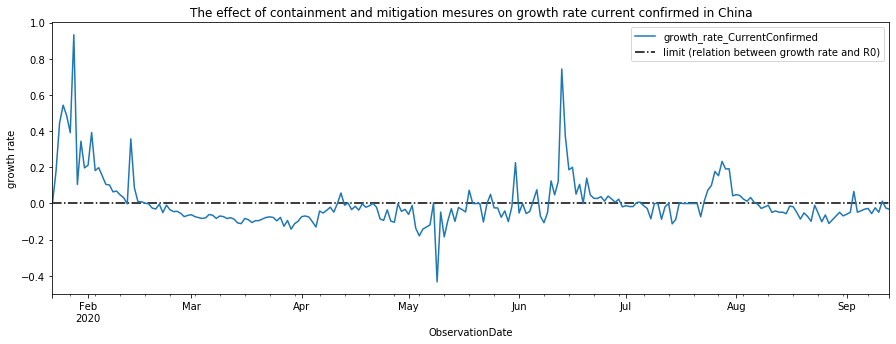

In [24]:
mainland_china.plot(x='ObservationDate', y = 'growth_rate_CurrentConfirmed', figsize=(15,5))
plt.hlines(0, mainland_china.ObservationDate.min(), mainland_china.ObservationDate.max(), 
           linestyles='dashdot', colors='black',
              label='limit (relation between growth rate and R0)')
plt.title('The effect of containment and mitigation mesures on growth rate current confirmed in China')
plt.legend(loc='best')
plt.ylabel('growth rate')

Text(0.5, 1.0, 'Control disease state in China')

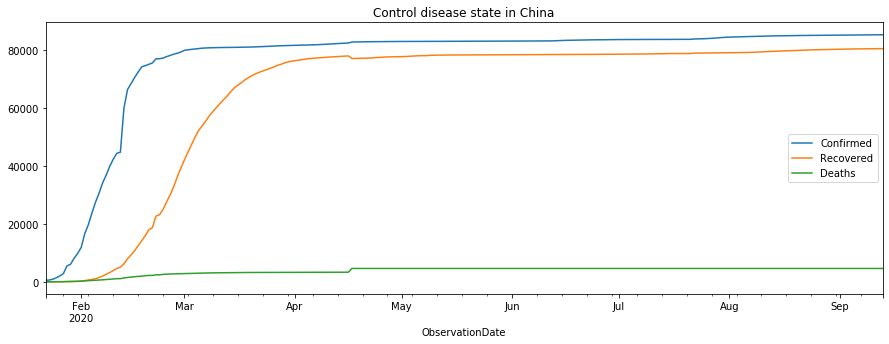

In [25]:
mainland_china[['ObservationDate','Confirmed','Recovered', 'Deaths']].plot(x='ObservationDate', figsize=(15,5))
plt.title('Control disease state in China')

# Italy containment and mitigation measures

In [26]:
italy = policy[policy['Country'] == 'Italy'].sort_values(by=['Date Start'])
c_italy = country[country['Country/Region'] == 'Italy']

## before

In [52]:
italy[italy['Date Start'] < '2020-02-24'].style.set_properties(**{'background-color': 'white',
                            'color': 'black',
                            'border-color': 'lawngreen'})

,Country,Date Start,Description of measure implemented
671,Italy,2020-01-31 00:00:00,"The first cases of COVID-19 in Italy during the 2019–20 worldwide pandemic were confirmed on 31 January 2020, when two Chinese tourists in Rome tested positive for the virus.["
662,Italy,2020-01-31 00:00:00,declared a state of emergency
663,Italy,2020-01-31 00:00:00,"On 31 January, the Italian government suspended all flights to and from China"
664,Italy,2020-01-31 00:00:00,The government also introduced thermal scanners and temperature checks on international passengers arriving at Italian airports.
670,Italy,2020-02-06 00:00:00,"On 6 February, an Italian repatriated from Wuhan tested positive for COVID-19, bringing the total number of cases in Italy to three."
680,Italy,2020-02-22 00:00:00,"In addition to the emergency phone numbers 112 and 118, new dedicated numbers were added for the different regions — Lombardy 800894545, Campania 800909699, Veneto 800462340, Piedmont 800333444 and Emilia-Romagna 800033033"
681,Italy,2020-02-22 00:00:00,"La Scala, Duomo di Milano and Piccolo Teatro in Milan, as well as Basilica Di San Marco in Venice, were closed until further notice. A Giorgio Armani fashion show, which was scheduled on Sunday, the last day of Milan Fashion Week 2020, went ahead without any media or buyers present; it was instead streamed live online."
682,Italy,2020-02-22 00:00:00,Authorities in Veneto cancelled the last two days of the Carnival of Venice.[174] Authorities in Piedmont cancelled the last three days of the Carnival of Ivrea.
764,Italy,2020-02-22 00:00:00,Universities in Lombardy extended their closure until 7 March.
668,Italy,2020-02-22 00:00:00,"Regional train services to the most affected areas were suspended, with trains skipping stops at Codogno, Maleo and Casalpusterlengo stations."


In [29]:
gr_italo = compute_growth_rate(c_italy)

## After

In [48]:
italy[italy['Date Start'] >= '2020-02-24'].style.set_properties(**{'background-color': 'white',
                            'color': 'black',
                            'border-color': 'white'})

,Country,Date Start,Description of measure implemented
717,Italy,2020-02-24 00:00:00,"Multiple regions in Italy such as Liguria, Trentino Alto Adige, Friuli Venezia Giulia, Abruzzo and Marche decided to close all schools and universities for two days to a week."
715,Italy,2020-02-24 00:00:00,Court proceedings were postponed until further notice
700,Italy,2020-02-24 00:00:00,"Major companies such as IBM, Enel, Luxottica, PwC and Vodafone continued to allow employees to work from home."
703,Italy,2020-02-24 00:00:00,The Ministry of Health announced that it had engaged 31 laboratories in Italy to carry out the analysis of swabs from suspected COVID-19 cases.
702,Italy,2020-02-24 00:00:00,"Minister Roberto Speranza appointed Walter Ricciardi, a member of World Health Organization's executive committee and former president of Italian National Institute of Health, as a special adviser for relations between Italy and international health organisations."
714,Italy,2020-02-24 00:00:00,"Some of the residents inside the Red Zone managed to leave the quarantined areas daily, bypassing the checkpoints by going through back roads."
706,Italy,2020-02-24 00:00:00,"On 24 February, 500 additional police officers were assigned to patrol the quarantined areas in Lodi and Veneto"
705,Italy,2020-02-24 00:00:00,"Additional toll-free numbers were added for other regions — Valle D'Aosta 800122121, Trentino Alto Adige 800751751, Friuli Venezia Giulia 800500300, Toscana 800556060, Umbria 800636363, Marche 800936677 and Lazio 800118800"
704,Italy,2020-02-24 00:00:00,"The governor of Basilicata, Vito Bardi, instituted a mandatory 14-day quarantine for people arriving from areas in Northern Italy affected by the outbreak"
701,Italy,2020-02-24 00:00:00,Filming of Mission: Impossible 7 starring Tom Cruise in Venice was halted.


## Growth rate

Text(0, 0.5, 'growth rate')

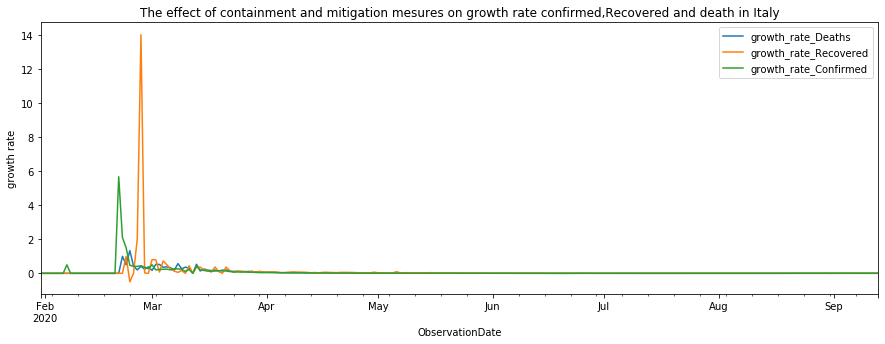

In [32]:
gr_italo[cols].plot(x='ObservationDate', figsize=(15,5))
plt.title('The effect of containment and mitigation mesures on growth rate confirmed,\
Recovered and death in Italy')
plt.ylabel('growth rate')

Text(0, 0.5, 'growth rate')

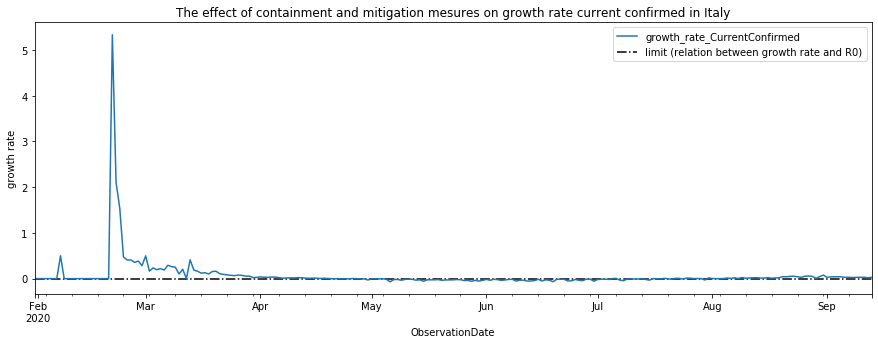

In [33]:
gr_italo.plot(x='ObservationDate', y = 'growth_rate_CurrentConfirmed', figsize=(15,5))
plt.hlines(0, gr_italo.ObservationDate.min(), gr_italo.ObservationDate.max(), 
           linestyles='dashdot', colors='black',
              label='limit (relation between growth rate and R0)')
plt.title('The effect of containment and mitigation measures on growth rate current confirmed in Italy')
plt.legend(loc='best')
plt.ylabel('growth rate')

Text(0.5, 1.0, 'Increasing recovered and deaths in Italy')

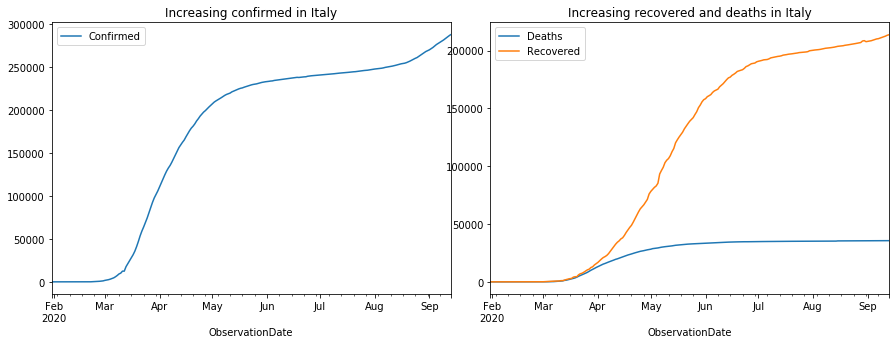

In [34]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.1)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
c_italy.plot(x='ObservationDate', y = 'Confirmed', ax=ax1)
ax1.set_title('Increasing confirmed in Italy')
c_italy[['ObservationDate','Deaths', 'Recovered']].plot(x='ObservationDate', ax=ax2)
ax2.set_title('Increasing recovered and deaths in Italy')

# Germany containment and mitigation measures

In [36]:
german = policy[policy['Country'] == 'Germany'].sort_values(by=['Date Start'])
germany = country[country['Country/Region'] == 'Germany']

## Before

In [49]:
german[german['Date Start'] <= '2020-02-28'].style.set_properties(**{'background-color': 'white',
                            'color': 'black',
                            'border-color': 'lawngreen'})

,Country,Date Start,Description of measure implemented
730,Germany,2020-01-28 00:00:00,"After a case was suspected in a Lufthansa plane, the company suspended all flights to China + This also applies to all flights operated by Swiss and Austrian Airlines"
732,Germany,2020-01-28 00:00:00,"Hotlines were established to calm down worried callers and advise unsettled citizens to follow the usual rules that are also appropriate to protect against a flu infection: regular hand washing, coughing or sneezing in a handkerchief or keeping your arm and distance from other sick people. —> doesn't seem that these were ""symptom"" hotlines in the sense that they would try to identify ill people and work with them further"
731,Germany,2020-01-29 00:00:00,The government ordered pilots of flights from China to describe the health status of their passengers and ordered passengers to fill out a contact document.
1,Germany,2020-02-01 00:00:00,"102 German citizens and 26 relatives, all of whom were symptom-free on departure, were evacuated from the Wuhan region to Frankfurt am Main by the Executive Transport Wing of the German Air Force. After their return, they were placed in quarantine in a military barrack in Rhineland-Palatinate for 14 days.[716] The coronavirus was found in two passengers on 2 February."
622,Germany,2020-02-28 00:00:00,"passengers from China, South Korea, Japan, Italy and Iran to report their health status before entry. Train railway companies must report passengers with symptoms"
738,Germany,2020-02-28 00:00:00,"The crisis team is of the opinion that if these principles are applied, imminent major international events such as the ITB should be canceled."
733,Germany,2020-02-28 00:00:00,Train railway companies must report passengers with symptoms to authorities and the federal police would step up checks within 30 kilometres of the border


In [38]:
gr_german = compute_growth_rate(germany)

## After

In [50]:

german[german['Date Start'] > '2020-02-28'].style.set_properties(**{'background-color': 'white',
                            'color': 'black',
                            'border-color': 'white'})

,Country,Date Start,Description of measure implemented
735,Germany,2020-03-04 00:00:00,medical protective equipment is generally no longer allowed to be exported abroad
736,Germany,2020-03-09 00:00:00,"Minister Spahn appealed to everyone's personal responsibility to minimize the risk of infection - for example, travel less if possible, work from home or avoid public transport."
737,Germany,2020-03-09 00:00:00,Federal Minister of Health Jens Spahn encourages to consistently cancel large events with more than 1000 participants until further notice.
739,Germany,2020-03-10 00:00:00,"the federal government's crisis team recommends that all major events with more than 1,000 expected participants be canceled"
740,Germany,2020-03-12 00:00:00,Chancellor Merkel also called for social contacts to be avoided wherever possible.
741,Germany,2020-03-12 00:00:00,"As far as medically justifiable, all scheduled recordings, operations and interventions in all hospitals are to be postponed indefinitely from Monday. With this measure, hospitals should be able to concentrate on the expected increasing demand for intensive care and ventilation capacities for the treatment of patients with severe respiratory diseases by Covid-19."
544,Germany,2020-03-13 00:00:00,14 of the 16 German federal states decided to close their schools and nurseries for the next few weeks
742,Germany,2020-03-13 00:00:00,Federal Minister of Finance Olaf Scholz and Federal Minister of Economics Peter Altmaier have presented a comprehensive package of measures to cushion the effects of the corona virus . They announced an unlimited corporate loan program .
560,Germany,2020-03-14 00:00:00,"Berlin, Schleswig-Holstein and Saarland closed bars among other leisure venues"
734,Germany,2020-03-15 00:00:00,Elections in Bavaria


Text(0, 0.5, 'growth rate')

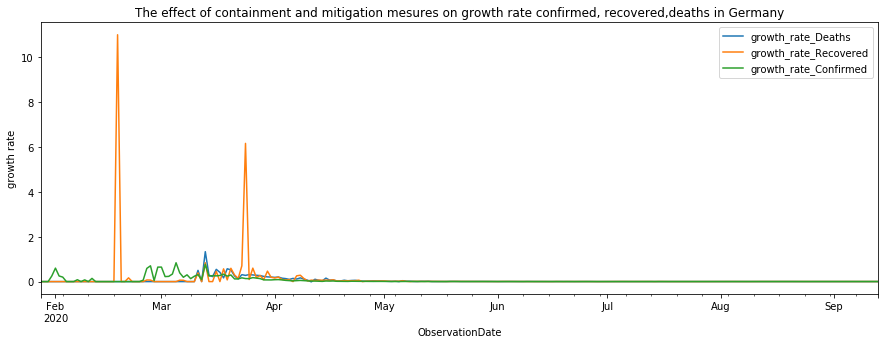

In [40]:
gr_german[cols].plot(x='ObservationDate', figsize=(15,5))
plt.title('The effect of containment and mitigation mesures on growth rate confirmed, recovered,\
deaths in Germany')
plt.ylabel('growth rate')

Text(0, 0.5, 'growth rate')

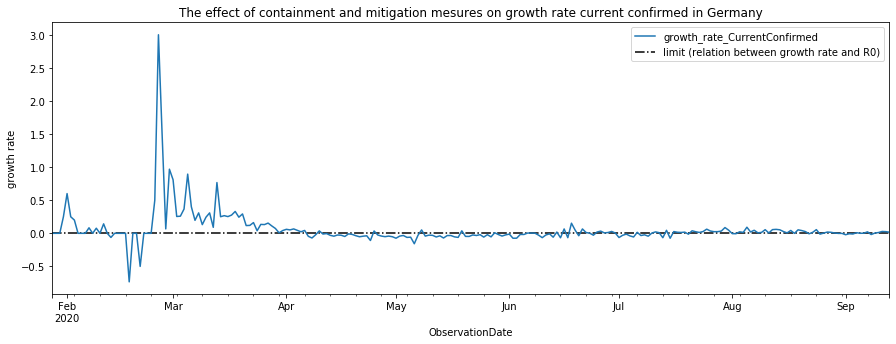

In [41]:
gr_german.plot(x='ObservationDate', y = 'growth_rate_CurrentConfirmed', figsize=(15,5))
plt.hlines(0, gr_german.ObservationDate.min(), gr_german.ObservationDate.max(), 
           linestyles='dashdot', colors='black',
              label='limit (relation between growth rate and R0)')
plt.title('The effect of containment and mitigation mesures on growth rate current confirmed in Germany')
plt.legend(loc='best')
plt.ylabel('growth rate')

Text(0.5, 1.0, 'Increasing recovered and deaths in Germany')

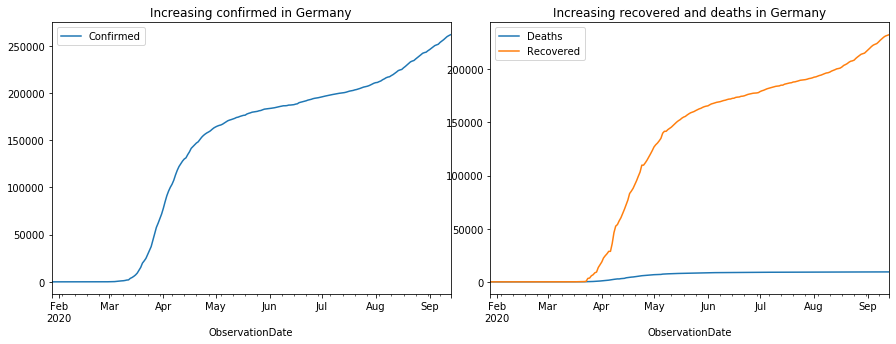

In [42]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.1)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
germany.plot(x='ObservationDate', y = 'Confirmed', ax=ax1)
ax1.set_title('Increasing confirmed in Germany')
germany[['ObservationDate','Deaths', 'Recovered']].plot(x='ObservationDate', ax=ax2)
ax2.set_title('Increasing recovered and deaths in Germany')

# Egypt containment and mitigation measures

In [43]:

cairo = policy[policy.Country == 'Egypt']
egypt = country[country['Country/Region'] == 'Egypt']

In [51]:
cairo.style.set_properties(**{'background-color': 'white',
                            'color': 'black',
                            'border-color': 'white'})

,Country,Date Start,Description of measure implemented
1416,Egypt,2020-02-14 00:00:00,First case confirmed
880,Egypt,2020-01-26 00:00:00,Flights from China to Egypt banned
893,Egypt,2020-03-07 00:00:00,qurantined passangers of MS River Anuket cruise ship where 45 people had tested positive
888,Egypt,2020-03-08 00:00:00,"Temperature sceening of travellers at airports. Reportedly, Asian tourists were screened"
889,Egypt,2020-03-13 00:00:00,"Suspension of flights to and from Khartoum, Sudan"
882,Egypt,2020-03-13 00:00:00,"City International School at Cairo’s Zamalek district closed after a parent of one of the school students has contacted a foreigner, who then tested positive for coronavirus. School students, teachers and headmasters were required to self-isolate for 14 days."
885,Egypt,2020-03-15 00:00:00,All schools and universities closed for two weeks
890,Egypt,2020-03-17 00:00:00,reducing energy prices for industrial users and cutting the tax on company dividends by half. Egypt will lower the price of natural gas for industrial use to $4.50 per mmbtu from $5.50.
887,Egypt,2020-03-17 00:00:00,Suspension of performances in cinemas and theatres
884,Egypt,2020-03-17 00:00:00,"Banned export of alcohol, disinfectants, means of protection, sterilization, and medical masks for a period of three months"


Text(0, 0.5, 'growth rate ')

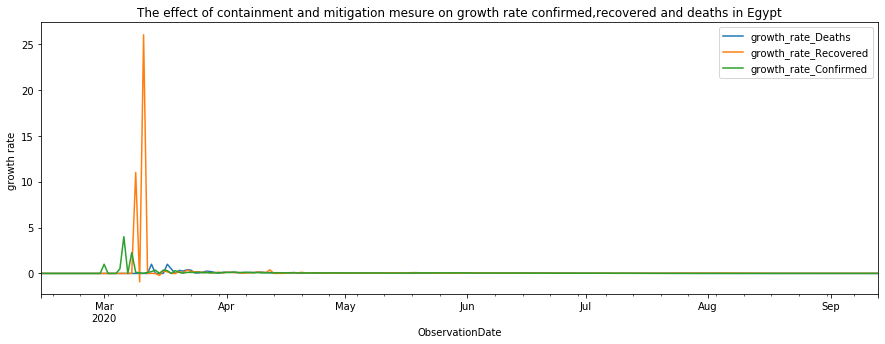

In [45]:
gr_egypt = compute_growth_rate(egypt)
gr_egypt[cols].plot(x='ObservationDate', figsize=(15,5))
plt.title('The effect of containment and mitigation mesure on growth rate confirmed,\
recovered and deaths in Egypt')
plt.ylabel('growth rate ')

Text(0, 0.5, 'growth rate')

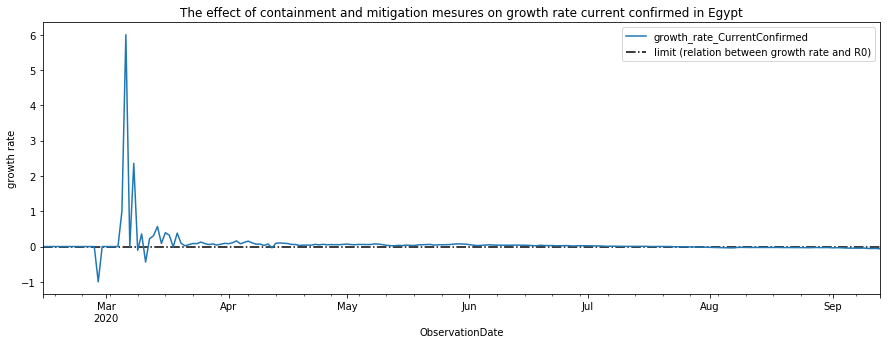

In [46]:
gr_egypt.plot(x='ObservationDate', y = 'growth_rate_CurrentConfirmed', figsize=(15,5))
plt.hlines(0, gr_egypt.ObservationDate.min(), gr_egypt.ObservationDate.max(), 
           linestyles='dashdot', colors='black',
              label='limit (relation between growth rate and R0)')
plt.title('The effect of containment and mitigation mesures on growth rate current confirmed in Egypt')
plt.legend(loc='best')
plt.ylabel('growth rate')

Text(0.5, 1.0, 'The fight against disease controlled by Egypt')

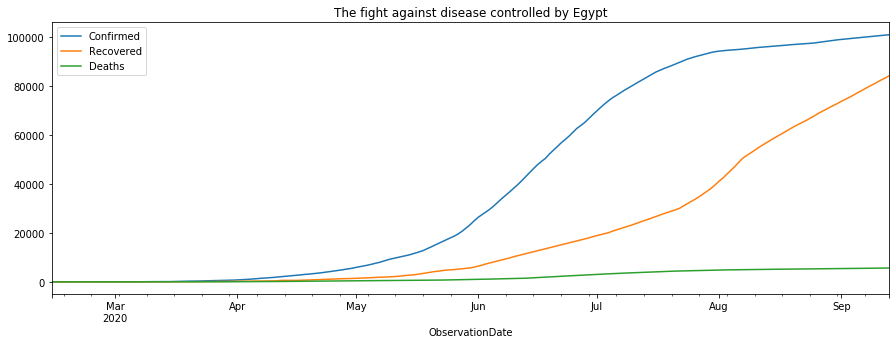

In [47]:
egypt[icols].plot(x='ObservationDate', figsize=(15,5))
plt.title('The fight against disease controlled by Egypt')